In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline

In [3]:
traindata = pd.read_csv("train.csv")

In [4]:
trainframe = pd.DataFrame(traindata)

In [5]:
trainframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
agemedian = np.median(trainframe["Age"])

In [7]:
trainframe["Age"] = trainframe["Age"].fillna(trainframe["Age"].median())

trainframe["Age"].median()

In [10]:
agemedian

32.0

Why are numpy and dataframe medians different? They should be the same, but they seem to be computed differently. THe fillna command with the numpy median was also not working correctly? Why?

In [11]:
trainframe.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
?loc

Object `loc` not found.


In [13]:
trainframe["Sex"].unique()

array(['male', 'female'], dtype=object)

In [18]:
trainframe.loc[trainframe["Sex"]== "male", "Sex"] = 0

In [20]:
trainframe.loc[trainframe["Sex"] == "female", "Sex"] = 1

In [21]:
trainframe["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
trainframe.loc[trainframe["Embarked"] == 'S', "Embarked"] = 0
trainframe.loc[trainframe["Embarked"] == 'C', "Embarked"] = 1
trainframe.loc[trainframe["Embarked"] == 'Q', "Embarked"] = 2

In [25]:
trainframe["Embarked"].describe()

count     889
unique      3
top         0
freq      644
Name: Embarked, dtype: int64

In [29]:
trainframe["Embarked"].count()

889

In [32]:
trainframe["Embarked"].median()

0.0

In [33]:
trainframe["Embarked"] = trainframe["Embarked"].fillna(trainframe["Embarked"].median())

In [34]:
trainframe["Embarked"].describe()

count    891.000000
mean       0.361392
std        0.635673
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64

Cleaning data should be done at this point. We have 891 rows for all  data, we have also converted non-numeric categories to numeric ones. We may have to go bck and add cabin information. It is possible cabin information was only available for survivors or their families, for instance.

In [36]:
trainframe["Cabin"].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [37]:
trainframe["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [38]:
import matplotlib.pyplot as plt
import matplotlib

In [39]:
trainframe["Fare"].plot.hist()

AttributeError: 'function' object has no attribute 'hist'

In [44]:
trainfare = pd.DataFrame(trainframe["Fare"])

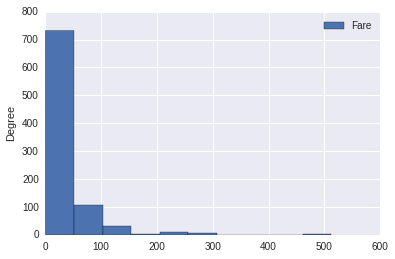

In [47]:
trainfare.plot(kind= "hist")

In [42]:
?plot

Object `plot` not found.


In [58]:
trainframe["Cabin"][trainframe["Fare"]> 50].count()

121

In [59]:
trainframe["Cabin"][trainframe["Fare"] > 50].describe()

count         121
unique         84
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [60]:
trainframe["Cabin"][trainframe["Fare"] > 50].unique()

array(['C85', 'C123', 'E46', 'C23 C25 C27', 'B78', nan, 'D33', 'B30',
       'B28', 'C83', 'E31', 'D10 D12', 'D26', 'C110', 'B58 B60', 'B86',
       'C2', 'E33', 'B80', 'D36', 'D15', 'C93', 'C78', 'D35', 'B77', 'E67',
       'C125', 'C99', 'D7', 'B49', 'C22 C26', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C91', 'E40', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E44', 'A34', 'C92', 'D21', 'A14',
       'D20', 'B79', 'B73', 'C95', 'B22', 'C86', 'C70', 'C101', 'C68',
       'E68', 'B41', 'A20', 'D19', 'D9', 'D48', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'C62 C64', 'C45', 'E8', 'B101',
       'C46', 'D30', 'D11', 'B3', 'B82 B84', 'B69', 'E49', 'A24', 'C50'], dtype=object)

In [67]:
trainframe["Cabin"][trainframe["Fare"] > 300].isnull().count()

3

In [74]:
trainframe["Fare"].unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

In [69]:
type(trainframe["Fare"])

pandas.core.series.Series

In [76]:
trainframe["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

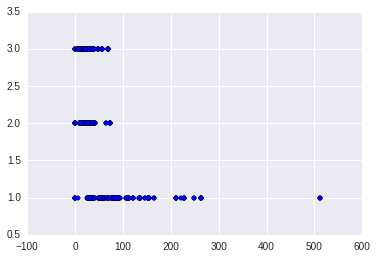

In [80]:
plt.scatter(trainframe["Fare"], trainframe ["Pclass"] )

In [82]:
trainframe["Pclass"].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

While we do not have cabin information, we do have class information. So for now we can use that.